# Practice Session 02: Management of networks data

In this session we will study an application of complex networks analysis to cooking. We will start with the *flavors network*, a bi-partite network connecting culinary ingredients to flavour compounds [*].

The initial dataset, prepared by [Ling Cheng in 2016](https://github.com/lingcheng99/Flavor-Network), contains three files:

* `ingredients.tsv` -- information about culinary ingredients
* `compounds.tsv` -- information about flavour compounds
* `ingredient-compound.tsv` -- flavour compounds present in each culinary ingredient
* `recipes.csv` -- ingredients used in recipes around the world (used only for extra points)

[*] Ahn, Y. Y., Ahnert, S. E., Bagrow, J. P., & Barabasi, A. L. (2011). [Flavor network and the principles of food pairing](https://doi.org/10.1038/srep00196). Scientific reports, 1(1), 1-7.

You can find this dataset in the data folder form this same github repository.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Telmo Linacisoro</font>

E-mail: <font color="blue">telmomaximlian.linacisoro01@estudiant.upf.edu</font>

Date: <font color="blue">Oct 5 2024</font>

# 0. Use a Cytoscape App (ClusterMaker2)

Cytoscape has "apps" that can be installed and used.

## 0.1. Install ClusterMaker2

Install ClusterMaker2 (``Apps > App Store``). You may be able to install it directly from a browser, or you may need to download a jar file from the [releases](https://apps.cytoscape.org/apps/clustermaker2) directory of clustermaker2, and then ``Apps > App Store > Install apps from file ...`` in the App Manager.

## 0.2. Use ClusterMaker2 to Karate Club

Use ClusterMaker2 on the Karate Club.

* Try with two different cluster algorithms in the `ClusterMaker2` plug-in. Not all the methods work: try two that do.
   * You can find a description of the algorithms used in the [ClusterMaker2 homepage](http://www.rbvi.ucsf.edu/cytoscape/clusterMaker2/)
   * You can start by running the affinity [affinity propagation](https://en.wikipedia.org/wiki/Affinity_propagation) clustering algorithm in ClusterMaker2 (Apps > ClusterMaker cluster network > Affinity Propagation Cluster ...) and seeing if that works.
      * * Once you run it, the network will have a new attribute in the nodes (in the node table you will see an attribute named ``_APCluster``)
      * Use the new attribute in the nodes for "Fill color" using a "Discrete mapping" on ``_APCluster.`` Note that with the right button you can generate a mapping out of a set of pre-defined ones.
* If you can choose an attribute in the clustering algorithm, you can choose "Edge betweenness"
   * You MUST run the network analyzer first, so you can have "Edge betweenness" as an attribute in edges
   * Use the new attributes in the nodes for "Fill color" using "Discrete mapping" on the attribute. Note that with the right button you can generate a mapping out of a set of pre-defined ones.
* Compare both obtained clusters with the actual one shown here:

![Karate Club](https://www.researchgate.net/profile/Marcus-Perry-2/publication/325719324/figure/fig1/AS:636707967889409@1528814417977/True-communities-of-Zacharys-karate-club-network.png)

**Affinity Propagation Cluster**

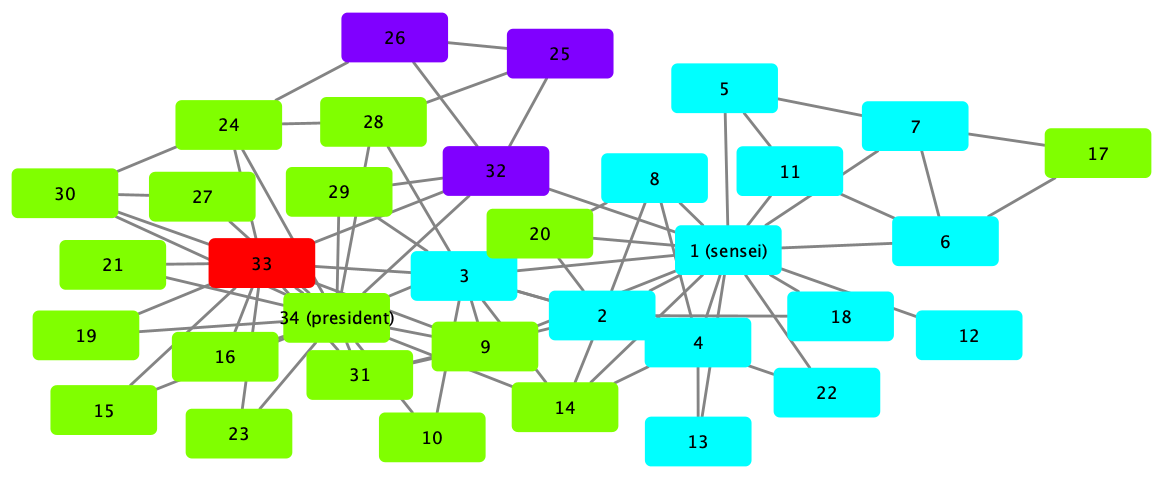

**Fast Greedy Cluster**

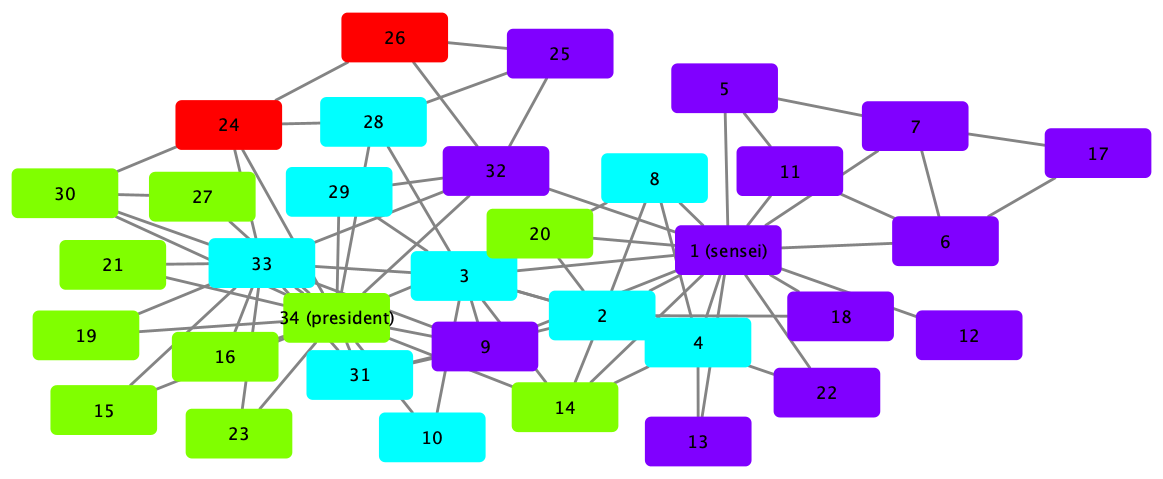

**Clustering Explanation**

We can see that there are actually two clusters, although both the Affinity Propagation and the Fast Greedy algorithms do not exactly separate them as shown in the image with the actual clusters.

This separation comes from the fact that there are two main figures (the sensei and the president), which leads to the formation of two distinct groups of individuals. This is quite natural, as people tend to align themselves based on social influences and leadership, creating clear divisions in the network.

*   **Closeness centrality:**

Closeness centrality means how close a node is to all other nodes in the network. It uses the average distance from a node to all other nodes, that is the nodes with high closeness centrality can reach other nodes quickly and efficiently and spread information faster.


*   **Betweenness centrality:**

Betweenness centrality is the the number of times a node acts as a bridge along the shortest path between two other nodes. It shows how important a node is in controlling the flow of information within the network. Nodes with high betweenness centrality connect different clusters, thus becoming more relevant to the network.

# 1. The flavors bi-partite graph

## 1.1. Read the bipartite graph in a dataframe


In [1]:
!pip install pandas

In [ ]:
%cd flavors-network

In [6]:
# Feel free to add imports if you need them

import io
import csv
import pandas as pd
import networkx as nx

from networkx.algorithms import bipartite

import numpy as np
import matplotlib
import scipy

import itertools

from IPython.display import Image

In [7]:
# Leave this code as-is

INPUT_INGR_FILENAME = "ingredients.tsv"
INPUT_COMP_FILENAME = "compounds.tsv"
INPUT_INGR_COMP_FILENAME = "ingredient-compound.tsv"

In [8]:
# Leave this code as-is

ingredients = pd.read_csv(INPUT_INGR_FILENAME, sep="\t")
display(ingredients.head(3))

compounds = pd.read_csv(INPUT_COMP_FILENAME, sep="\t")
display(compounds.head(3))

ingr_comp = pd.read_csv(INPUT_INGR_COMP_FILENAME, sep="\t")
display(ingr_comp.head(3))


,ingredient_id,ingredient_name,ingredient_category
0,0,magnolia_tripetala,flower
1,1,calyptranthes_parriculata,plant
2,2,chamaecyparis_pisifera_oil,plant derivative


,compound_id,compound_name,compound_code
0,0,jasmone,488-10-8
1,1,5-methylhexanoic_acid,628-46-6
2,2,l-glutamine,56-85-9


,ingredient_id,compound_id
0,1392,906
1,1259,861
2,1079,673


## 1.2. Create the flavors bipartite network

In [10]:
ingredients_compounds = ingredients.set_index('ingredient_id').join(ingr_comp.set_index('ingredient_id'), how='inner')

flavors = ingredients_compounds.set_index('compound_id').join(compounds.set_index('compound_id'), how='inner')

display(flavors.head(10))

,ingredient_name,ingredient_category,compound_name,compound_code
compound_id,,,,
995,magnolia_tripetala,flower,diacetyl,431-03-8
921,calyptranthes_parriculata,plant,citral_(neral),5392-40-5
1018,chamaecyparis_pisifera_oil,plant derivative,undecanoic_acid,112-37-8
272,mackerel,fish/seafood,"2,4-nonadienal",6750-03-4
275,mackerel,fish/seafood,lauric_acid,143-07-7
423,mackerel,fish/seafood,vanillin,121-33-5
424,mackerel,fish/seafood,2-pentylfuran,3777-69-3
282,mackerel,fish/seafood,"vanillin,_natural",121-33-5
972,mackerel,fish/seafood,3-octen-2-one,1669-44-9


In [11]:
flavors = flavors.drop(columns=['compound_code'])

flavors = flavors.sort_values(['ingredient_name', 'compound_name'])

flavors = flavors.reset_index(drop=True)

display(flavors.head(10))

,ingredient_name,ingredient_category,compound_name
0,abies_alba,plant,bornyl_acetate
1,abies_alba_pine_needle,plant,maltol
2,abies_balsamea_oil,plant derivative,myrcene
3,abies_canadensis,plant,bornyl_acetate
4,abies_concolor,plant,bornyl_acetate
5,abies_sibirica,plant,bornyl_acetate
6,abies_sibirica,plant,camphene
7,abies_sibirica,plant,isoborneol
8,acacia,plant,(e)-2-hexenyl_hexanoate
9,acacia,plant,benzyl_acetate


In [12]:
flavors[['ingredient_name', 'ingredient_category', 'compound_name']].to_csv('flavors.tsv', sep='\t', index=False)

## 1.3. Open this bi-partite network in Cytoscape


**Flavors rosemary**

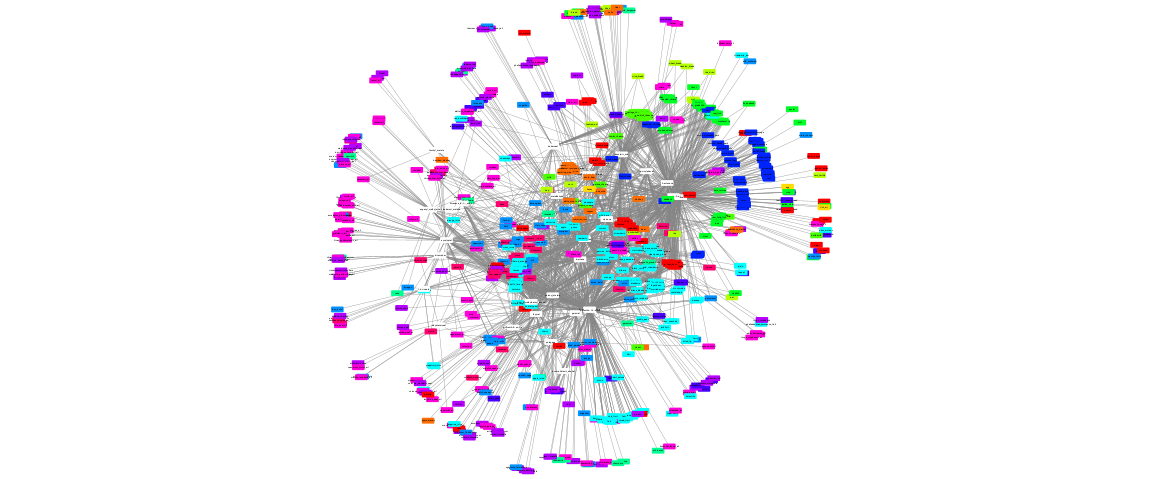

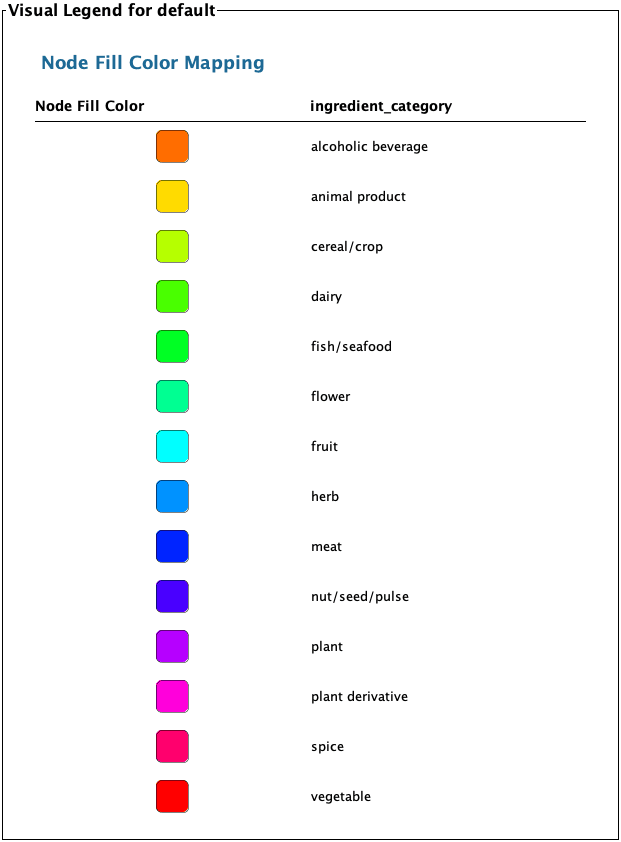

In [ ]:
# KEEP THIS CELL AS-IS

# Just adjust width/height if necessary

Image(url="flavors_rosemary.png", width=1200)

#For google colab, you can alternative use this to plot the image:
#import matplotlib.pyplot as plt
#img = plt.imread('flavors_rosemary.png')
#plt.axis('off')
#plt.imshow(img)

**Common compounds**

The common components were selected by applying a filter for degree, set to two. I then added coffee and cocoa, used a hierarchical layout, placing cocoa at the top and coffee at the bottom.

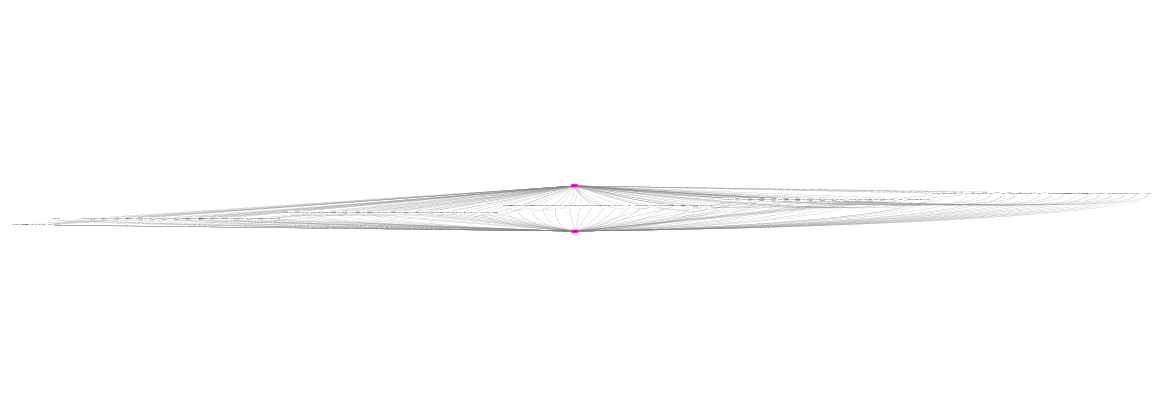


After extracting the common compounds by filtering by degree of two we can answer the questionof how many contribute to the bitternes by filtering these by those ending in "pyrrole" "pyrazine" "quinoline," or "theobromine" the count we get is of 21.


For the sake of completeness the full list of these 21 alkaloid-containing compounds is the following:
* 2,3-dimethylpyrazine
* 3-ethyl-2,6-dimethylpyrazine
* 2,5-dimethylpyrazine
* 6,7-dihydro-2,3-dimethyl-5h-cyclopentapyrazine
* 5h-5-methyl-6,7-dihydrocyclopenta(b)pyrazine
* 2-propionylpyrrole
* methyl-2-pyrrolyl ketone
* 5-isopropyl-2-methylpyrazine
* 2-ethylpyrazine
* 2-acetyl-3-methylpyrazine
* 2-isobutyl-3-methoxypyrazine
* 2-ethyl-3,5(6)-dimethylpyrazine
* 2,3,5-trimethylpyrazine
* 2,3,5,6-tetramethylpyrazine
* 2,3-diethyl-5-methylpyrazine
* 2-ethyl-5-methylpyrazine
* pyrrole
* 2-methylpyrazine
* 2,5-diethyl-3-methylpyrazine
* acetylpyrazine
* 3,5-diethyl-2-methylpyrazine
* quinoline

In [ ]:
# KEEP THIS CELL AS-IS

# Just adjust width/height if necessary

Image(url="compounds-in-common.png", width=1200)

# 2. The ingredient-ingredient graph

## 2.1. Create an ingredient-ingredient.gml file


In [19]:
ingredients = pd.read_csv("ingredients.tsv", sep="\t")

ingredients_array = np.asarray(ingredients['ingredient_name'])

print("There are %d ingredients" % len(ingredients_array))

There are 1530 ingredients


In [24]:
ingredients_array = np.asarray(ingredients['ingredient_name'].unique())
print("There are %d ingredients" % (len(ingredients_array)))

ingredient_to_compounds = {}

for index, row in flavors.iterrows():
    ingredient = row['ingredient_name']
    compound = row['compound_name']

    if ingredient not in ingredient_to_compounds:
        ingredient_to_compounds[ingredient] = set()

    ingredient_to_compounds[ingredient].add(compound)

There are 1530 ingredients


In [37]:
ingredient_ingredient = nx.Graph()

MIN_COMMON_COMPOUNDS = 90

for ingredient1, ingredient2 in itertools.combinations(ingredients_array, 2):
    # Check if both ingredients exist in the dictionary before proceeding
    if ingredient1 in ingredient_to_compounds and ingredient2 in ingredient_to_compounds:
        size = len(ingredient_to_compounds[ingredient1].intersection(ingredient_to_compounds[ingredient2]))

        if size >= MIN_COMMON_COMPOUNDS:
            ingredient_ingredient.add_edge(ingredient1, ingredient2, weight=size)

In [36]:
# Leave as-is
print("The ingredient-ingredient graph has %d nodes and %d edges" %
      (ingredient_ingredient.number_of_nodes(), ingredient_ingredient.number_of_edges()))

The ingredient-ingredient graph has 121 nodes and 851 edges


In [38]:
OUTPUT_INGR_INGR_FILENAME = 'ingredient-ingredient.gml'

In [40]:
nx.write_gml(ingredient_ingredient, OUTPUT_INGR_INGR_FILENAME)

## 2.2. Work with this file in Cytoscape

In [ ]:
# Change width if necessary

display(Image(url="ingr-ingr.png", width=1200))

display(Image(url="ingr-ingr-legend.gif", width=400))

Two interesting pairing would be bear and fried bief or white wine and strawberry.

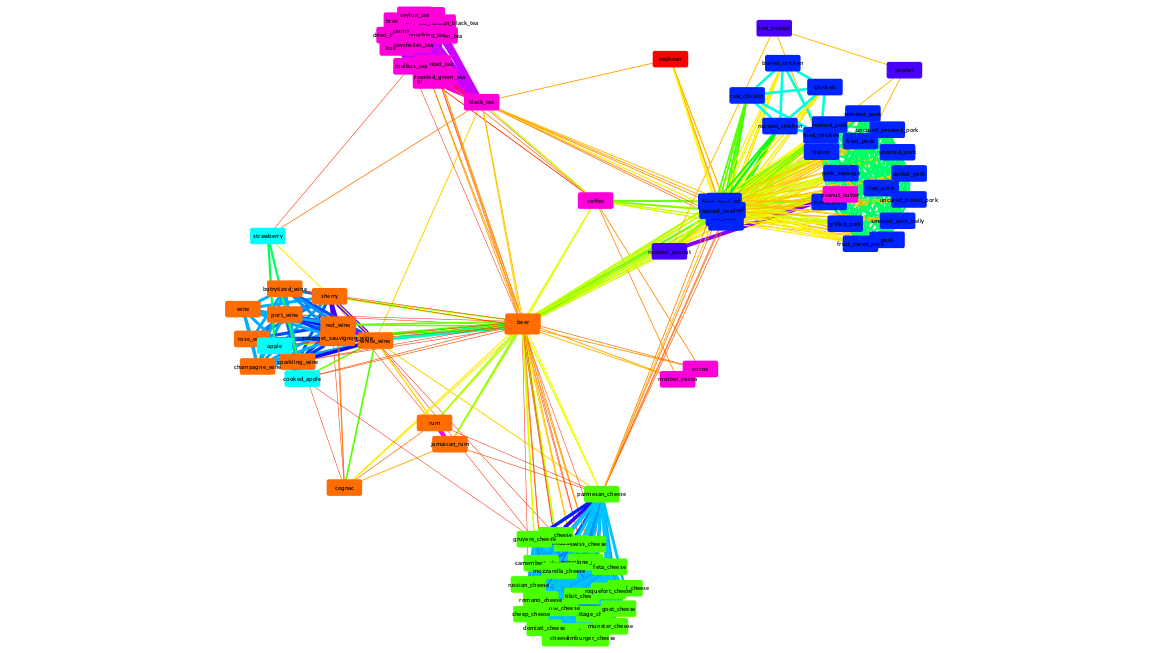

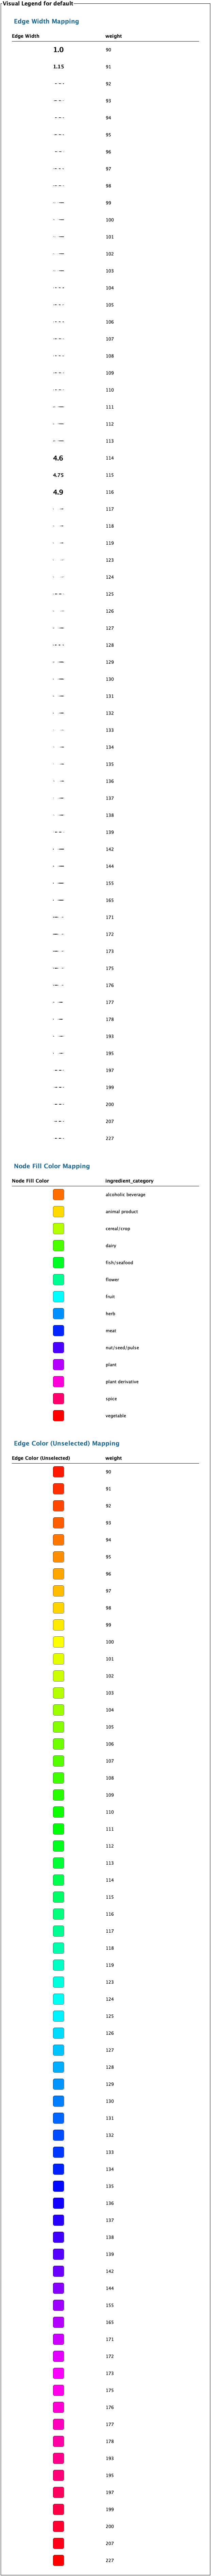

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>
